In [1]:
import pandas as pd
import numpy as np
import scipy.io as scio
from sklearn.svm import SVC

%load_ext autoreload
%autoreload 2
import main

In [2]:
mat = scio.loadmat('ex5data2.mat')

x = pd.DataFrame(mat['X'])
y = pd.DataFrame(mat['y']).iloc[:, 0]

y0 = y[y == 0]
y1 = y[y == 1]
x0 = x.iloc[y0.index]
x1 = x.iloc[y1.index]

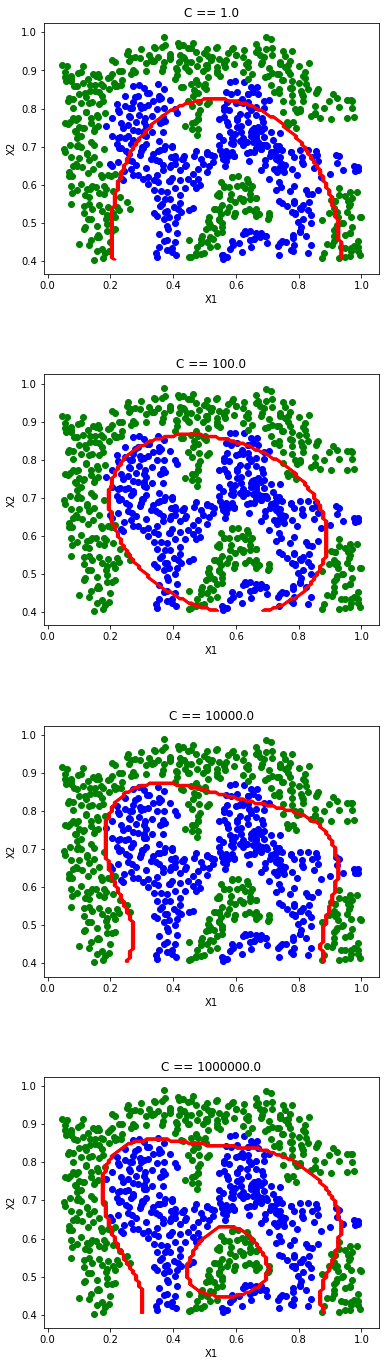

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt


C = np.logspace(0, 6, 4)
sigma_squared = 1

xx1, xx2 = np.meshgrid(
    np.linspace(x[0].min(), x[0].max(), 100),
    np.linspace(x[1].min(), x[1].max(), 100),
)

fig = plt.figure(figsize=(6, 6*len(C)))
subplots = fig.subplots(len(C), 1)
for c, ax in zip(C, subplots):
    ax.scatter(x.iloc[y0.index, 0], x.iloc[y0.index, 1], c='blue')
    ax.scatter(x.iloc[y1.index, 0], x.iloc[y1.index, 1], c='green')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('C == {}'.format(c))
    
    clf = SVC(kernel=main.gaussian(sigma_squared), C = c, gamma='auto')
    clf.fit(x, y)
    prediction = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]) \
        .reshape(xx1.shape)
    ax.contour(xx1, xx2, prediction, colors='red')

fig.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()